In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wine_data.csv',usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic Acid']

In [3]:
df

,Class label,Alcohol,Malic Acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


In [11]:
df.isnull().sum

<bound method DataFrame.sum of      Class label  Alcohol  Malic Acid
0          False    False       False
1          False    False       False
2          False    False       False
3          False    False       False
4          False    False       False
..           ...      ...         ...
172        False    False       False
173        False    False       False
174        False    False       False
175        False    False       False
176        False    False       False

[177 rows x 3 columns]>

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((123, 2), (54, 2))

In [5]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [7]:
X_train_scaled

,Alcohol,Malic Acid
0,-0.159363,-0.151815
1,-1.147410,-0.316832
2,0.175299,1.617162
3,0.087649,1.148515
4,0.350598,-0.112211
...,...,...
118,-0.430279,-0.066007
119,0.231076,-0.587459
120,-0.223108,1.056106
121,0.836653,0.125413


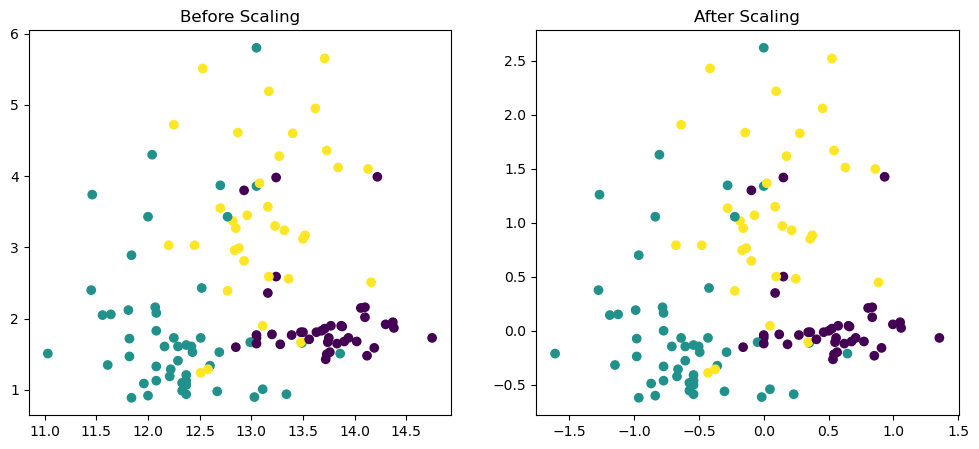

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

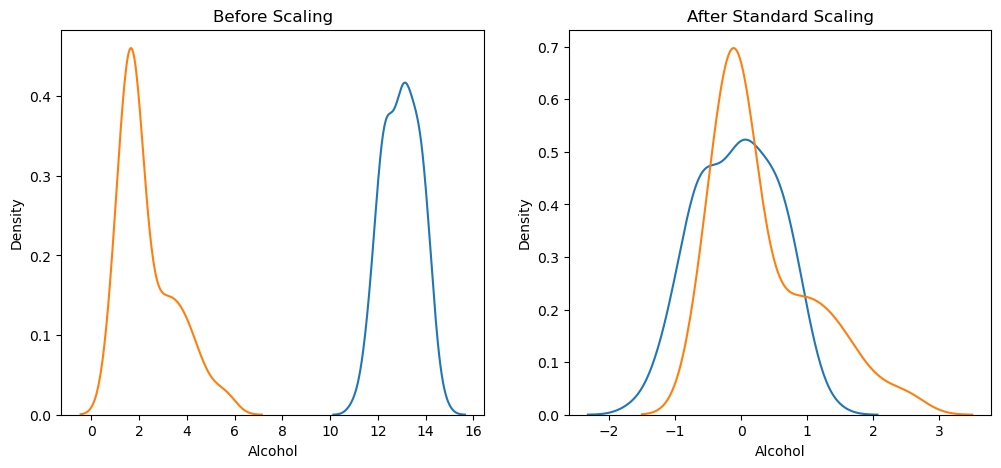

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.7407407407407407
Scaled 0.7407407407407407


Accuracy scores for both min-max and robust scaling are same. Since the dataframe is not sparse or has veryless/none zero value, therefore here we can use the min-max scale for normalization.